HIERARCHICAL CLUSTERING

In [ ]:
install.packages("proxy")

library(proxy)
library(readr)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



DATA PREPARATION

In [ ]:
#Reading first 100 records from the training dataset and creating a dataframe
df <- read_csv('train.csv', n_max=100,  show_col_types = FALSE)
df

text,summary
<chr>,<chr>
"The method of obtaining new integrable coupled equations through enlarging spectral problems of known integrable equations, which was recently proposed by W.-X. Ma, can produce nonintegrable systems as well. This phenomenon is demonstrated and explained by the example of the enlarged spectral problem of the Korteweg - de Vries equation.",Enlarged spectral problems and nonintegrability
"The Open Science Collaboration recently reported that 36% of published findings from psychological studies were reproducible by independent researchers. We can use this information together with Bayes theorem to estimate the statistical power needed to produce these findings under various assumptions and calculate the expected distribution of positive and negative evidence for a range of prior probabilities of the tested hypotheses; and by comparing this distribution to other findings indicating that >90% of publications in the psychological literature are statistically significant in support of the authors hypothesis, we can estimate the magnitude of publication bias. The results indicate that negative evidence was observed 30--200 times before one was published.",Recent reproducibility estimates indicate that negative evidence is observed over 30 times before publication
"Inter-Prediction is used effectively in multiple standards, including H.264 and HEVC (also known as H.265). It leverages correlation between blocks of consecutive video frames in order to perform motion compensation and thus predict block pixel values and reduce transmission bandwidth. In order to reduce the magnitude of the transmitted Motion Vector (MV) and thus reduce bandwidth, the encoder utilizes Predicted Motion Vector (PMV), which is derived by taking the median vector of the corresponding MVs of the neighboring blocks. In this research, we propose innovative methods, based on neural networks prediction, for improving the accuracy of the calculated PMV. We begin by showing a straightforward approach of calculating the best matching PMV and signaling its neighbor block index value to the decoder while reducing the number of bits required to represent the result without adding any computation complexity. Then we use a classification Fully Connected Neural Networks (FCNN) to estimate from neighbors the PMV without requiring signaling and show the advantage of the approach when employed for high motion movies. We demonstrate the advantages using fast forward movies. However, the same improvements apply to camera streams of autonomous vehicles, drone cameras, Pan-Tilt-Zoom (PTZ) cameras, and similar applications whereas the MVs magnitudes are expected to be large. We also introduce a regression FCNN to predict the PMV. We calculate Huffman coded streams and demonstrate an order of ~34% reduction in number of bits required to transmit the best matching calculated PMV without reducing the quality, for fast forward movies with high motion.",Improvements of Motion Estimation and Coding using Neural Networks
"Proton-proton collision data recorded in 2011 and 2012 by the \lhcb experiment, co\-rres\-pon\-ding to an integrated luminosity of 3.0\invfb, are a\-na\-lysed to search for the charmless ${B^0 \to \rho^0 \rho^0}$ decay. More than 600 ${\B^0 \to (\pi^+\pi^-)(\pi^+\pi^-)}$ signal decays are selected and used to perform an amplitude analysis from which the ${B^0 \to \rho^0 \rho^0}$ decay is observed for the first time with 7.1 standard deviations significance. The fraction of ${B^0 \to \rho^0 \rho^0}$ decays yielding a longitudinally polarised final state is measured to be $\fL = 0.745^{+0.048}_{-0.058} ({\rm stat}) \pm 0.034 ({\rm syst})$. The ${B^0 \to \rho^0 \rho^0}$ branching fraction, using the ${\B^0 \to \phi K^*(892)^{0}}$ decay as reference, is also reported as ${\BF(B^0 \to \rho^0 \rho^0) = (0.94 \pm 0.17 ({\rm stat}) \pm 0.09 ({\rm syst}) \pm 0.06 ({\rm BF})) \times 10^{-6}}$.",Observation of the ${B^0 \to \rho^0 \rho^0}$ decay from an ampl

In [ ]:
# Creating 'title_length' and 'abstract_lenghth' columns
df$title_length <- nchar(as.character(df$text))
df$abstract_length <- nchar(as.character(df$summary))


In [ ]:
#Creating a new dataframe consisting only title_length and abstract_length columns
numeric_features <- df[c('title_length', 'abstract_length')]
numeric_features

title_length,abstract_length
<int>,<int>
338,47
774,111
1667,66
896,126
252,79
1413,105
215,87
536,62
536,42


In [ ]:
# Converting 'numeric_features' dataframe to matrix
numeric_matrix <- as.matrix(numeric_features)


In [ ]:
# Removing rows where title_length or abstract_length is less than 1
numeric_features <- numeric_features[!(numeric_features$title_length < 1 | numeric_features$abstract_length < 1), ]

# Displaying the updated DataFrame
numeric_features


title_length,abstract_length
<int>,<int>
338,47
774,111
1667,66
896,126
252,79
1413,105
215,87
536,62
536,42


HIERARCHICAL CLUSTERING

In [ ]:
# Calculate Euclidean distance matrix
euclidean_distance_matrix <- proxy::dist(numeric_matrix, method = "Euclidean")

# Convert Euclidean distance matrix to cosine similarity matrix
cosine_similarity_matrix <- 1 / (1 + euclidean_distance_matrix)

# Using the cosine similarity matrix for hierarchical clustering
hclust_model <- hclust(as.dist(cosine_similarity_matrix), method = 'average')


VISUALISATION

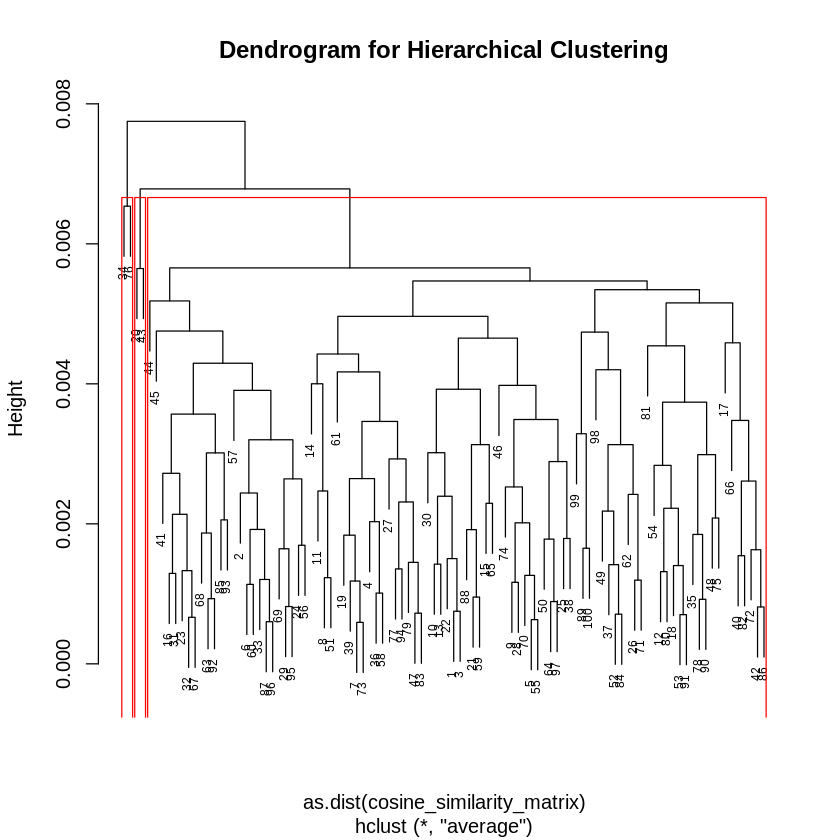

In [ ]:
# Plot dendrogram
plot(hclust_model, main="Dendrogram for Hierarchical Clustering", cex=0.6)
rect.hclust(hclust_model, k = 3, border = "red")

In [ ]:
# Cut the tree into clusters (we can choose the height cutoff based on the dendrogram)
clusters <- cutree(hclust_model, h = 0.0067)

# Creating a new DataFrame with cluster assignments
clustered_data <- data.frame(numeric_matrix, cluster = clusters)

# Displays hierarchical clustering results
print(cbind(numeric_matrix, cluster = clusters))

       title_length abstract_length cluster
  [1,]          338              47       1
  [2,]          774             111       1
  [3,]         1667              66       1
  [4,]          896             126       1
  [5,]          252              79       1
  [6,]         1413             105       1
  [7,]          215              87       1
  [8,]          536              62       1
  [9,]          536              42       1
 [10,]          588              38       1
 [11,]          905              52       1
 [12,]         1323              69       1
 [13,]         1287              92       1
 [14,]          707             109       1
 [15,]          686              71       1
 [16,]          564              96       1
 [17,]          858              85       1
 [18,]          990             131       1
 [19,]          617              57       1
 [20,]          721              93       2
 [21,]          459              50       1
 [22,]          983             